In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from glob import glob
import random

# Settings for pretty plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

/var/folders/fb/3308pyvn1558d6y6rn0bw5sm0000gn/T/ipykernel_8413/2420292870.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_vision, x='Count', y='Disease_Class', palette='viridis')


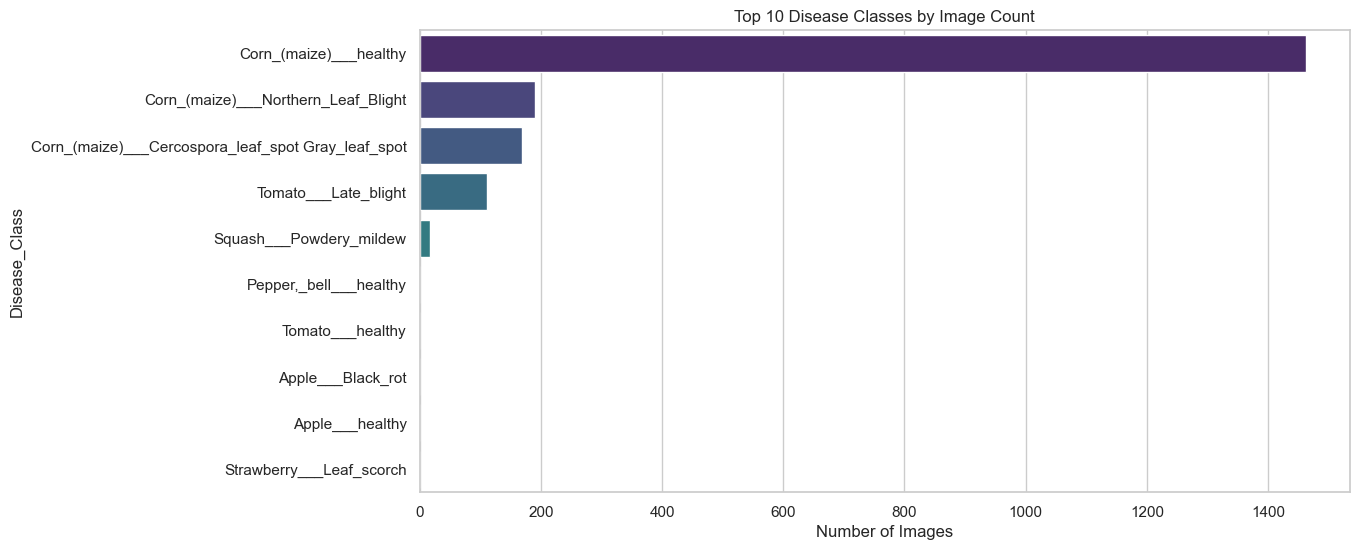

In [2]:
# Define path
data_dir = "../data/processed/dataset_yolo/train" # Go up one level from notebooks dir

# 1. Count Images per Class
class_folders = glob(data_dir + "/*")
class_counts = {os.path.basename(f): len(glob(f + "/*.jpg")) for f in class_folders}

df_vision = pd.DataFrame(list(class_counts.items()), columns=['Disease_Class', 'Count'])
df_vision = df_vision.sort_values('Count', ascending=False).head(10) # Top 10

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_vision, x='Count', y='Disease_Class', palette='viridis')
plt.title("Top 10 Disease Classes by Image Count")
plt.xlabel("Number of Images")
plt.show()

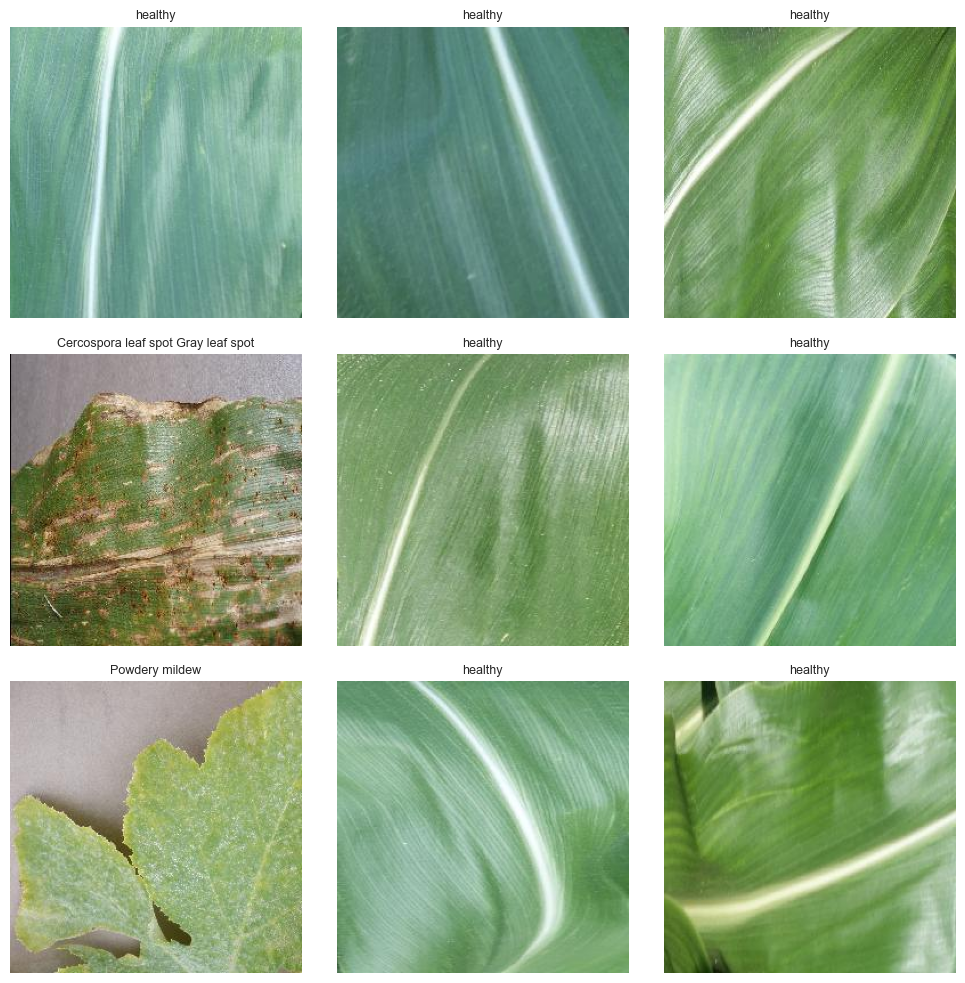

In [3]:
# Function to plot grid
def plot_sample_grid(data_path, rows=3, cols=3):
    all_images = glob(data_path + "/*/*.jpg")
    random_samples = random.sample(all_images, rows * cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        img = cv2.imread(random_samples[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Get Label from folder name
        label = os.path.basename(os.path.dirname(random_samples[i]))
        clean_label = label.split('___')[-1].replace('_', ' ')
        
        ax.imshow(img)
        ax.set_title(clean_label, fontsize=9)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_sample_grid(data_dir)

Dataset Head:


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


/var/folders/fb/3308pyvn1558d6y6rn0bw5sm0000gn/T/ipykernel_8413/1129702856.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_yield.values, y=state_yield.index, palette='magma')


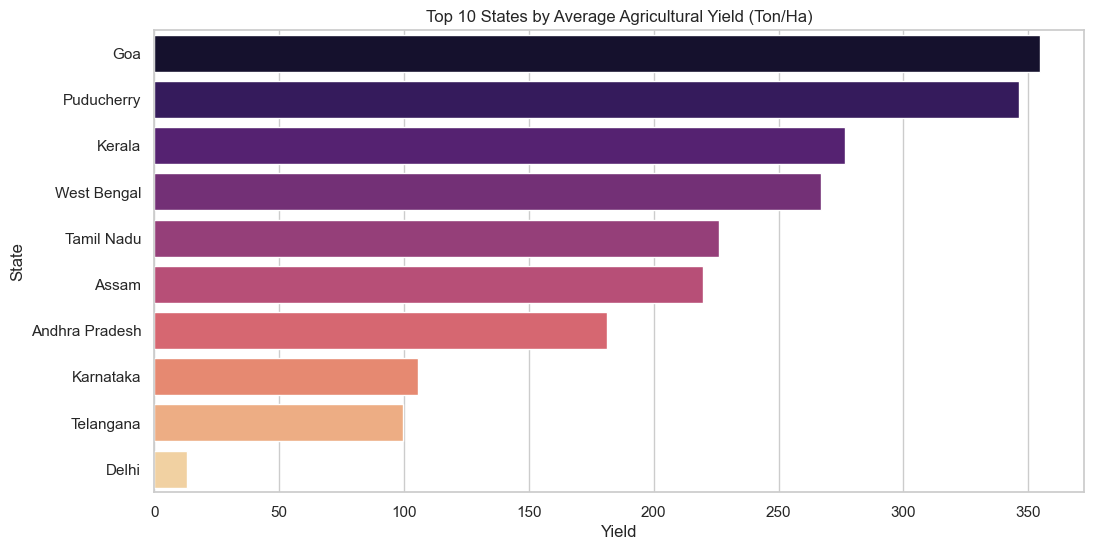

In [4]:
# Load Financial Data
fin_files = glob("../data/raw/financial/*.csv")
# Pick the crop yield file automatically
yield_file = [f for f in fin_files if 'yield' in f.lower() or 'crop' in f.lower()][0]

df_fin = pd.read_csv(yield_file)

# Cleaning (Same logic as our engine)
df_fin.columns = [c.strip().replace(' ', '_') for c in df_fin.columns]
# Rename standard columns if needed
for col in df_fin.columns:
    if 'state' in col.lower(): df_fin.rename(columns={col: 'State'}, inplace=True)
    if 'yield' in col.lower(): df_fin.rename(columns={col: 'Yield'}, inplace=True)
    if 'crop' in col.lower() and 'year' not in col.lower(): df_fin.rename(columns={col: 'Crop'}, inplace=True)

print("Dataset Head:")
display(df_fin.head())

# Analysis: Average Yield by State (Top 10 High Performing States)
state_yield = df_fin.groupby('State')['Yield'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_yield.values, y=state_yield.index, palette='magma')
plt.title("Top 10 States by Average Agricultural Yield (Ton/Ha)")
plt.xlabel("Yield")
plt.show()